In [86]:
#Imports 2
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib as mpl

In [87]:
#Estimators 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [88]:
#Model Metrics 2
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score
#Cross Validation 2
from sklearn.model_selection import train_test_split

In [89]:
credit = pd.read_csv("credit card clients.csv", header =1)

In [90]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [91]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [92]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [93]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


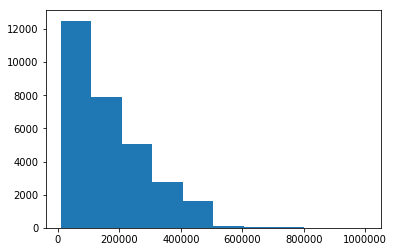

In [94]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

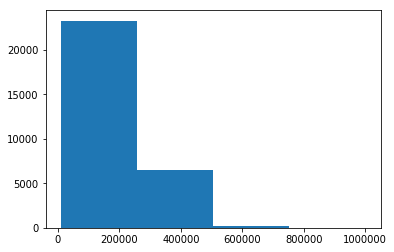

In [95]:
plt.hist(credit['LIMIT_BAL'], bins=4)

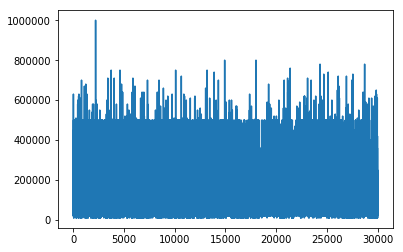

In [96]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

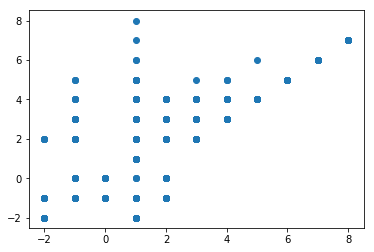

In [97]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

In [98]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


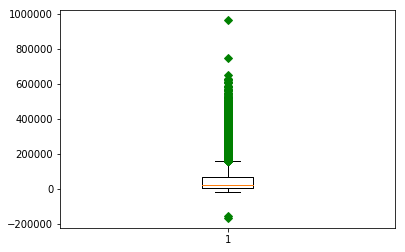

In [99]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [100]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [101]:
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL          SEX  \
ID                          7.500250e+07  2.941664e+07    78.356379   
LIMIT_BAL                   2.941664e+07  1.683446e+10  1571.050630   
SEX                         7.835638e+01  1.571051e+03     0.239247   
EDUCATION                   2.681543e+02 -2.247403e+04     0.005502   
MARRIAGE                   -1.314525e+02 -7.323670e+03    -0.008014   
AGE                         1.491057e+03  1.730767e+05    -0.409726   
PAY_0                      -2.975726e+02 -3.954593e+04    -0.031685   
PAY_2                      -1.162770e+02 -4.603765e+04    -0.041442   
PAY_3                      -1.916922e+02 -4.443225e+04    -0.038694   
PAY_4                      -2.769132e+01 -4.057181e+04    -0.034411   
PAY_5                      -2.178600e+02 -3.667056e+04    -0.030521   
PAY_6                      -2.018774e+02 -3.509308e+04    -0.024754   
BILL_AMT1                   1.236447e+07  2.727020e+09 -1211.694332   
BILL_A

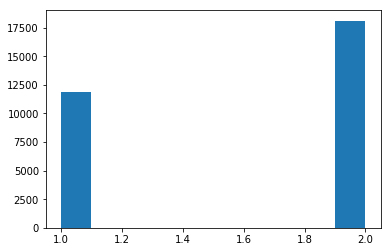

In [102]:
plt.hist(credit['SEX'])
plt.show()

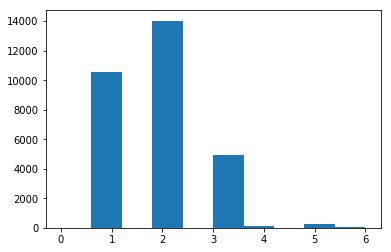

In [103]:
plt.hist(credit['EDUCATION'])
plt.show()

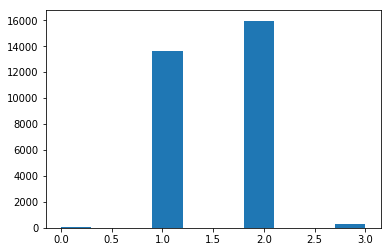

In [104]:
plt.hist(credit['MARRIAGE'])
plt.show()

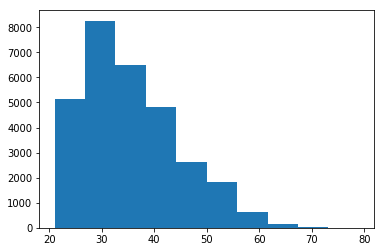

In [105]:
plt.hist(credit['AGE'])
plt.show()

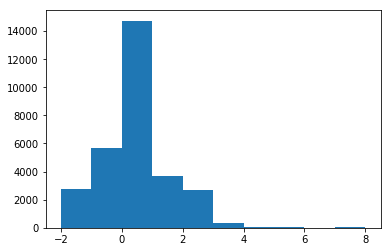

In [106]:
plt.hist(credit['PAY_0'])
plt.show()

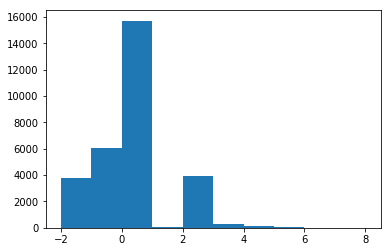

In [107]:
plt.hist(credit['PAY_2'])
plt.show()

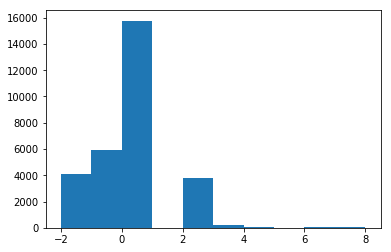

In [108]:
plt.hist(credit['PAY_3'])
plt.show()

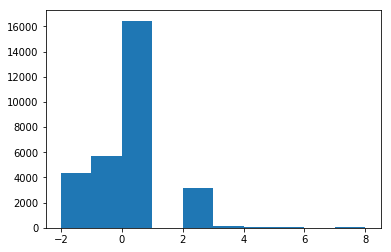

In [109]:
plt.hist(credit['PAY_4'])
plt.show()

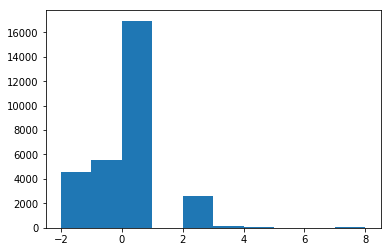

In [110]:
plt.hist(credit['PAY_5'])
plt.show()

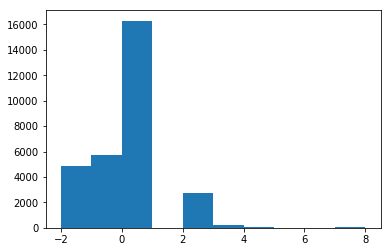

In [111]:
plt.hist(credit['PAY_6'])
plt.show()

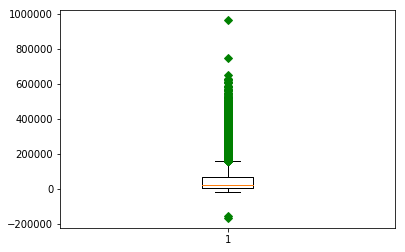

In [112]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

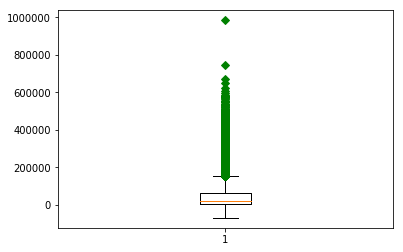

In [113]:
A = credit['BILL_AMT2']
plt.boxplot(A,0,'gD')
plt.show()

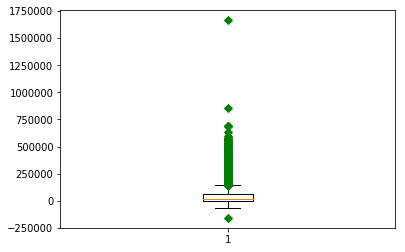

In [114]:
A = credit['BILL_AMT3']
plt.boxplot(A,0,'gD')
plt.show()

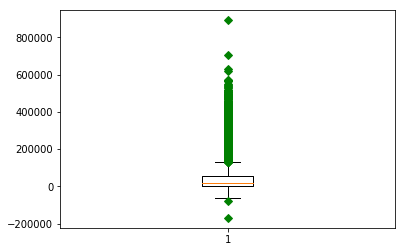

In [115]:
A = credit['BILL_AMT4']
plt.boxplot(A,0,'gD')
plt.show()

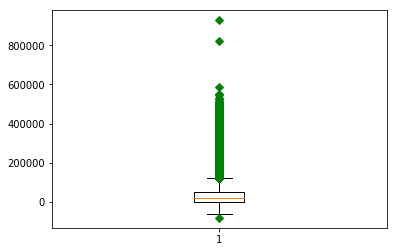

In [116]:
A = credit['BILL_AMT5']
plt.boxplot(A,0,'gD')
plt.show()

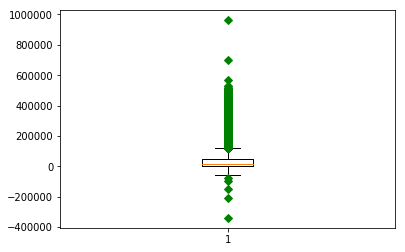

In [117]:
A = credit['BILL_AMT6']
plt.boxplot(A,0,'gD')
plt.show()

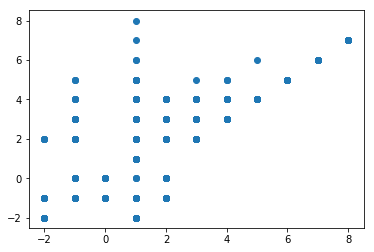

In [118]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

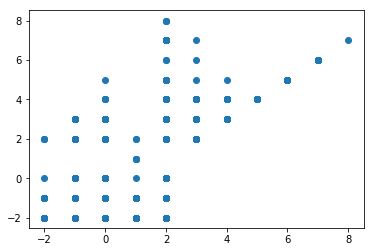

In [119]:
x = credit['PAY_2']
y = credit['PAY_3']
plt.scatter(x,y)
plt.show()

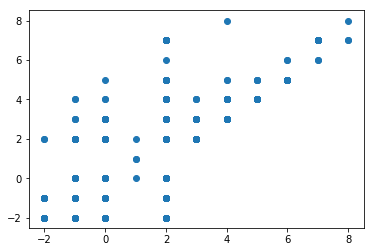

In [120]:
x = credit['PAY_3']
y = credit['PAY_4']
plt.scatter(x,y)
plt.show()

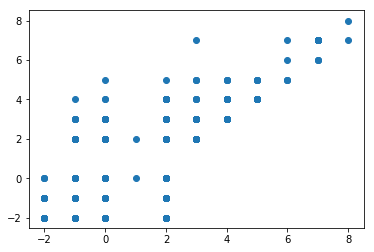

In [121]:
x = credit['PAY_4']
y = credit['PAY_5']
plt.scatter(x,y)
plt.show()

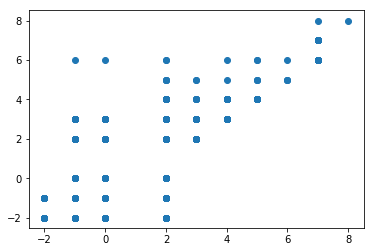

In [122]:
x = credit['PAY_5']
y = credit['PAY_6']
plt.scatter(x,y)
plt.show()

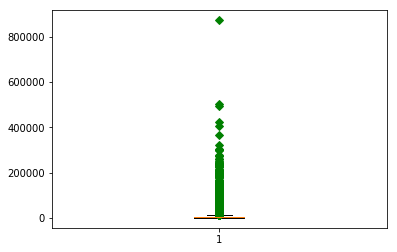

In [123]:
A = credit['PAY_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

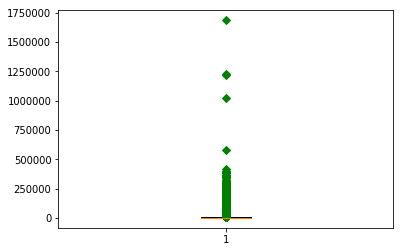

In [124]:
A = credit['PAY_AMT2']
plt.boxplot(A,0,'gD')
plt.show()

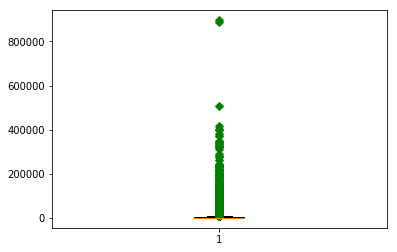

In [125]:
A = credit['PAY_AMT3']
plt.boxplot(A,0,'gD')
plt.show()

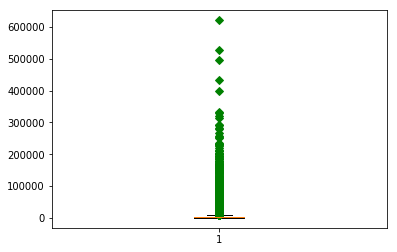

In [126]:
A = credit['PAY_AMT4']
plt.boxplot(A,0,'gD')
plt.show()

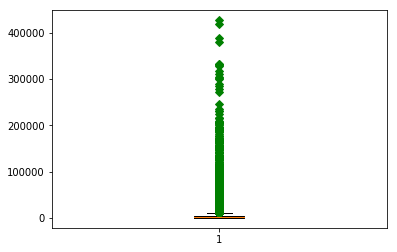

In [127]:
A = credit['PAY_AMT5']
plt.boxplot(A,0,'gD')
plt.show()

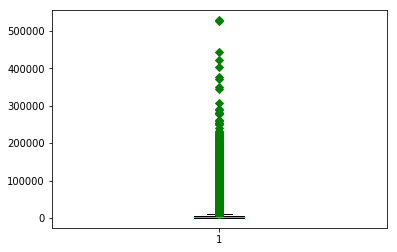

In [128]:
A = credit['PAY_AMT6']
plt.boxplot(A,0,'gD')
plt.show()

In [129]:
credit.groupby(['SEX', 'default payment next month'])['SEX'].count()

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: SEX, dtype: int64

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


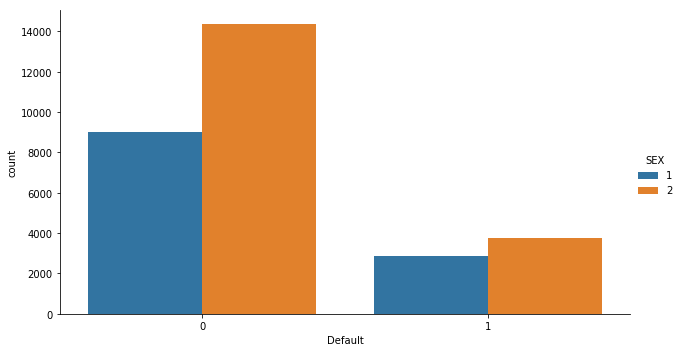

In [130]:
g = sns.factorplot('default payment next month', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [131]:
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

NameError: name 'age' is not defined

In [ ]:
credit['AGE'].hist(bins=50)

In [132]:
credit.groupby(['EDUCATION', 'default payment next month'])['EDUCATION'].count()

EDUCATION  default payment next month
0          0                                14
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
4          0                               116
           1                                 7
5          0                               262
           1                                18
6          0                                43
           1                                 8
Name: EDUCATION, dtype: int64

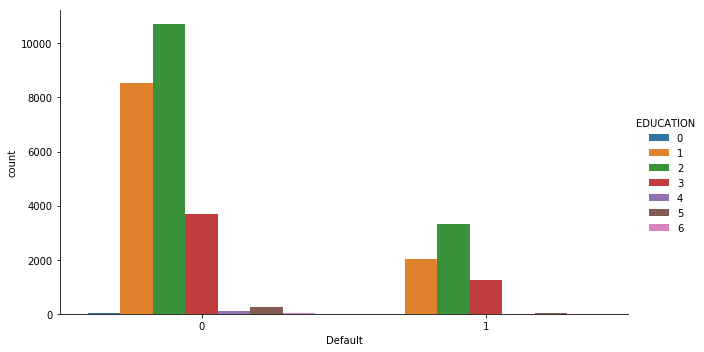

In [133]:
g = sns.factorplot('default payment next month', data=credit, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('Default')

In [134]:
credit.groupby(['MARRIAGE', 'default payment next month'])['MARRIAGE'].count()

MARRIAGE  default payment next month
0         0                                49
          1                                 5
1         0                             10453
          1                              3206
2         0                             12623
          1                              3341
3         0                               239
          1                                84
Name: MARRIAGE, dtype: int64

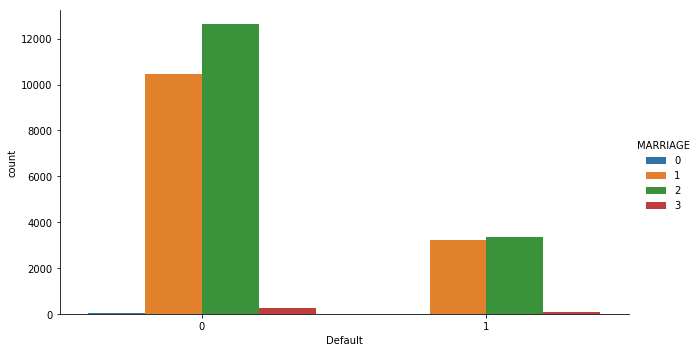

In [135]:
g = sns.factorplot('default payment next month', data=credit, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('Default')

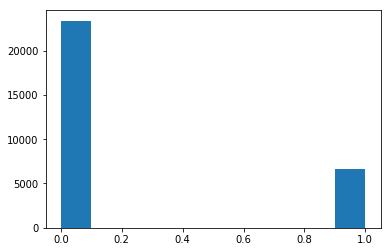

In [136]:
plt.hist(credit['default payment next month'])
plt.show()

In [137]:
#data 2
rawData = pd.read_csv('credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [138]:
###Drop NA 2
rawData.dropna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [139]:
#features 2
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [140]:
###Preprocessing 2
from sklearn import preprocessing
X_scaled = preprocessing.scale(features)

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
#dependent variable 2
depVar = rawData['default payment next month']

In [142]:
#Training Set (Feature Space: X Training) 2
X_train = (X_scaled[: 1000])

In [143]:
#Dependent Variable Training Set (y Training) 2
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [144]:
#Testing Set (X Testing) 2
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [145]:
#Ground Truth (y_test) 2
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [146]:
#2
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [147]:
#2
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [148]:
#2
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [149]:
#Models 2
modelSVC = SVC(gamma='scale')
modelRF = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
modelKN = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [150]:
#features 2
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [151]:
#dependent variable 2
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [152]:
#2
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [153]:
#2
modelSVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [154]:
#2
modelKN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [155]:
#2
print(cross_val_score(modelRF, X_train, y_train))

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.76595745 0.68449198 0.78609626]


In [156]:
#Model Fitting 2
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.76595745 0.68449198 0.78609626]


0.9483985765124555

In [157]:
#2
modelSVC.fit(X_train,y_train)
print(cross_val_score(modelSVC, X_train, y_train)) 
modelSVC.score(X_train,y_train)

[0.78723404 0.78609626 0.78609626]


c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.7864768683274022

In [158]:
#2
modelKN.fit(X_train,y_train)
print(cross_val_score(modelKN, X_train, y_train)) 
modelKN.score(X_train,y_train)

c:\users\esteban vargas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.74468085 0.70588235 0.7486631 ]


0.7953736654804271

In [159]:
#2
predictionsRF = modelRF.predict(X_test)

In [160]:
predictionsSVC = modelSVC.predict(X_test)

In [161]:
predictionsKN = modelKN.predict(X_test)

In [162]:
#2
predictionsRF

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [163]:
predictionsSVC

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [164]:
predictionsKN

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [165]:
#2
accuracy_score(y_test, predictionsRF),cohen_kappa_score(y_test, predictionsRF)

(0.7606382978723404, 0.12204234122042334)

In [166]:
#2
accuracy_score(y_test, predictionsSVC),cohen_kappa_score(y_test, predictionsSVC)

(0.7606382978723404, 0.0)

In [167]:
#2
accuracy_score(y_test, predictionsKN),cohen_kappa_score(y_test, predictionsKN)

(0.7340425531914894, 0.1384051329055913)